In [2]:
%matplotlib inline

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

/Users/jeremy/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Basic Autoencoder

In [6]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5(784/32), assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)  # encoding
decoded = Dense(784, activation='sigmoid')(encoded)  # decoding

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)  # (input, output)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np

In [33]:
(x_train, _), (x_test, _) = mnist.load_data()  # np.array

In [34]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3769 - val_loss: 0.2722
Epoch 2/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.2644 - val_loss: 0.2532
Epoch 3/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.2435 - val_loss: 0.2312
Epoch 4/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2239 - val_loss: 0.2139
Epoch 5/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2089 - val_loss: 0.2011
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.1977 - val_loss: 0.1915
Epoch 7/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1893 - val_loss: 0.1842
Epoch 8/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1825 - val_loss: 0.1779
Epoch 9/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.1766 - val_loss: 0.1725
Epoch

In [14]:
import matplotlib.pyplot as plt
import gc

In [15]:
gc.collect()

228

In [16]:
decoded_imgs = autoencoder.predict(x_test)

In [17]:
decoded_imgs.shape

(10000, 784)

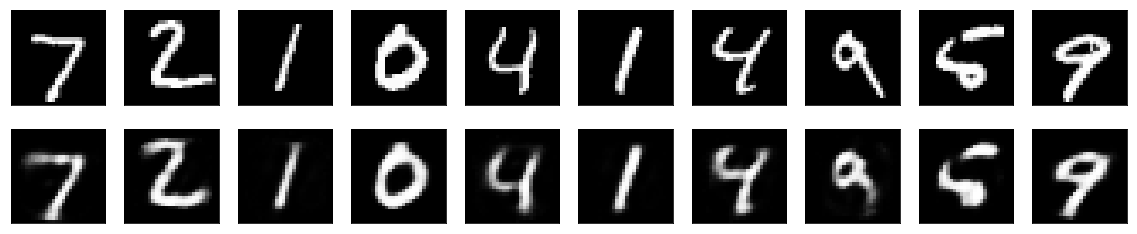

In [18]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#### Regularized Autoencoder

In [24]:
from keras import regularizers

In [25]:
encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.6844 - val_loss: 0.6606
Epoch 2/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.6439 - val_loss: 0.6272
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.6111 - val_loss: 0.5952
Epoch 4/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.5801 - val_loss: 0.5655
Epoch 5/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.5518 - val_loss: 0.5386
Epoch 6/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.5263 - val_loss: 0.5145
Epoch 7/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.5036 - val_loss: 0.4932
Epoch 8/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.4835 - val_loss: 0.4743
Epoch 9/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.4658 - val_loss: 0.4

60000/60000 [==============================] - 3s 45us/step - loss: 0.2830 - val_loss: 0.2829
Epoch 78/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2827 - val_loss: 0.2826
Epoch 79/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2824 - val_loss: 0.2823
Epoch 80/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2821 - val_loss: 0.2820
Epoch 81/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2818 - val_loss: 0.2817
Epoch 82/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2815 - val_loss: 0.2814
Epoch 83/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2813 - val_loss: 0.2811
Epoch 84/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2810 - val_loss: 0.2809
Epoch 85/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [========================

In [28]:
gc.collect()

180

In [35]:
decoded_imgs = autoencoder.predict(x_test)

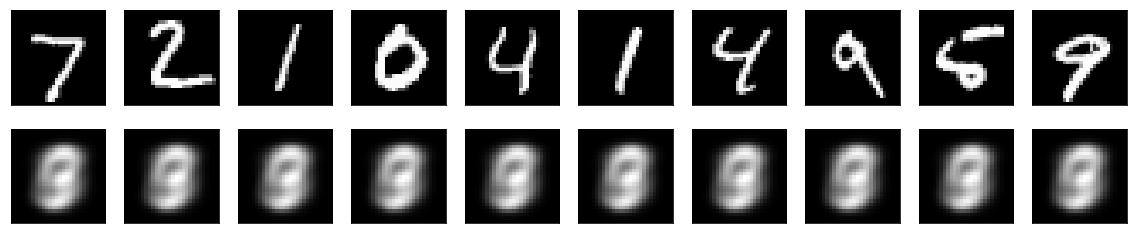

In [36]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#### Deep Autoencoder

In [38]:
nput_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [40]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.2537 - val_loss: 0.2422
Epoch 2/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2320 - val_loss: 0.2237
Epoch 3/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2162 - val_loss: 0.2091
Epoch 4/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.2058 - val_loss: 0.1982
Epoch 5/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.1932 - val_loss: 0.1867
Epoch 6/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.1831 - val_loss: 0.1801
Epoch 7/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.1756 - val_loss: 0.1696
Epoch 8/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.1693 - val_loss: 0.1642
Epoch 9/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.1642 - val_loss: 0.1596
Epoch